### 多层神经网络的手写数字识别模型
    
+ 模块导入分为 3 个部分:
    > numpy, 
    > pytorch,
    > dataset.
    
+ 加载MNIST数据集

In [20]:
# numpy 模块
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# pytorch 模块
import torch
import torch.nn as nn
import torch.nn.functional as F

# 数据集模块
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [7]:
train_datasets = dsets.MNIST(root='data/mnist',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)
test_datasets = dsets.MNIST(root='data/mnist',
                           train=False,
                           transform=transforms.ToTensor(),
                           download=True)

Processing...
Done!


In [8]:

train_loader = DataLoader(train_datasets,
                         batch_size = 100,
                         num_workers=6)

test_loader = DataLoader(test_datasets,
                         batch_size = 100,
                         num_workers=6)

shape of x: torch.Size([60000, 28, 28])
labels of x: tensor([5, 0, 4,  ..., 5, 6, 8])


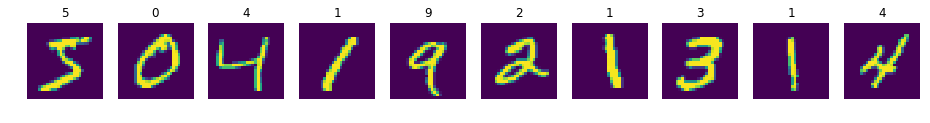

In [21]:
# 测试数据集和打印相关信息
x = train_datasets.train_data
y = train_datasets.train_labels
print('shape of x:', x.shape)
print('labels of x:', y)

plt.figure(figsize=(16,2))
for r in range(10):
    plt.subplot(1,10,r+1)
    plt.imshow(x[r].numpy())
    plt.title('%d'%(y[r]))
    plt.axis('off')


In [26]:
# 建立网络模型
# 3层的全连接神经网络模型
class Fnn(nn.Module):
    def __init__(self):
        super(Fnn, self).__init__()
        self.fc1 = nn.Linear(784,500)
        self.fc2 = nn.Linear(500,300)
        self.fc3 = nn.Linear(300,10)
       
        
        
    def forward(self,x):
        o = x.view(-1,784)
        o = self.fc1(o)
        o = F.relu(o)
        
        o = self.fc2(o)
        o = F.relu(o)
        
        o = self.fc3(o)
        o = F.relu(o)
        return o


In [29]:
net = Fnn()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

nepochs = 20 # 训练多少次

records = []
for epoch in range(nepochs):
    
    for bx, by in train_loader:
        optimizer.zero_grad()
        o = net(bx)
        error = criterion(o,by)
        error.backward()
        optimizer.step()
        
        records.append(error.item())
    print(epoch,'train loss: %.2e'%(error.item()))

0 train loss: 5.04e-01
1 train loss: 4.48e-01
2 train loss: 4.30e-01
3 train loss: 4.19e-01
4 train loss: 4.08e-01
5 train loss: 3.99e-01
6 train loss: 3.94e-01
7 train loss: 3.86e-01
8 train loss: 3.85e-01
9 train loss: 3.80e-01
10 train loss: 3.72e-01
11 train loss: 3.65e-01
12 train loss: 3.59e-01
13 train loss: 3.54e-01
14 train loss: 1.58e-01
15 train loss: 1.41e-01
16 train loss: 1.36e-01
17 train loss: 1.32e-01
18 train loss: 1.29e-01
19 train loss: 1.27e-01


In [30]:
def eval_accuracy(net,dataloader):
    acc = 0
    n_total = 0
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()
        o = net(batch_x)
        _,pred = o.max(dim=1)
        acc += (pred==batch_y).float().mean().item()
        n_total += 1
    return acc/n_total * 100

In [32]:
print('test accuracy',
      eval_accuracy(net,test_loader)
    )

test accuracy 97.89000058174133
